In [1]:
import pandas as pd
from deadlift_data_import import import_data
from top50 import top50
import matplotlib.pyplot as plt

# Import the top 50 Raw lifters of all time by weight class and sex
df = top50()

# Create chart of average bodyweight, average deadlift and heaviest deadlift by weight class and sex
# Then calculate the relative strength and absolute & relative strength percent growth figures
sex_age_comparisons = (
    df.groupby(["weightclass_lbs", "sex"])
        .agg(
            avg_bodyweight_lbs=("bodyweight_lbs", "mean"), 
            avg_deadlift_lbs=("deadlift_lbs", "mean"), 
            heaviest_deadlift=("deadlift_lbs", "max"), 
            average_age=("age", "mean"), 
            oldest=("age", "max"), 
            youngest=("age", "min")
        )
        .round(2)
)

sex_age_comparisons

avg_bodyweight_lbs  avg_deadlift_lbs  \
weightclass_lbs    sex                                         
148                F                147.76            512.15   
                   M                146.18            664.96   
165                F                164.36            524.63   
                   M                169.27            725.36   
181                F                176.80            530.61   
                   M                181.09            772.74   
198                F                193.59            538.02   
                   M                211.55            817.96   
220                F                214.43            514.23   
                   M                218.63            844.96   
242                M                235.81            874.88   
275                M                264.88            867.55   
308                M                296.23            875.96   
Super Heavy Weight F                273.24            570.58   
                   M                348.58            876.48   

                        heaviest_deadlift  average_age  oldest  youngest  
weightclass_lbs    sex                                                    
148                F               562.18        29.89    44.0      20.5  
                   M               759.49        26.81    46.5      15.0  
165                F               617.29        31.74    62.0      19.5  
                   M               804.69        27.17    41.0      16.0  
181                F               622.81        31.84    44.0      21.0  
                   M               892.87        26.84    41.0      19.0  
198                F               645.95        32.13    52.0      22.0  
                   M               903.89        28.69    47.0      19.0  
220                F               586.43        34.87    55.0      20.5  
                   M               955.70        27.91    47.0      21.0  
242                M              1030.66        29.23    44.0      22.0  
275                M              1074.75        30.51    47.0      22.0  
308                M              1025.15        30.21    40.0      22.0  
Super Heavy Weight F               636.03        32.10    55.0      22.0  
                   M               970.03        31.07    44.0      22.0

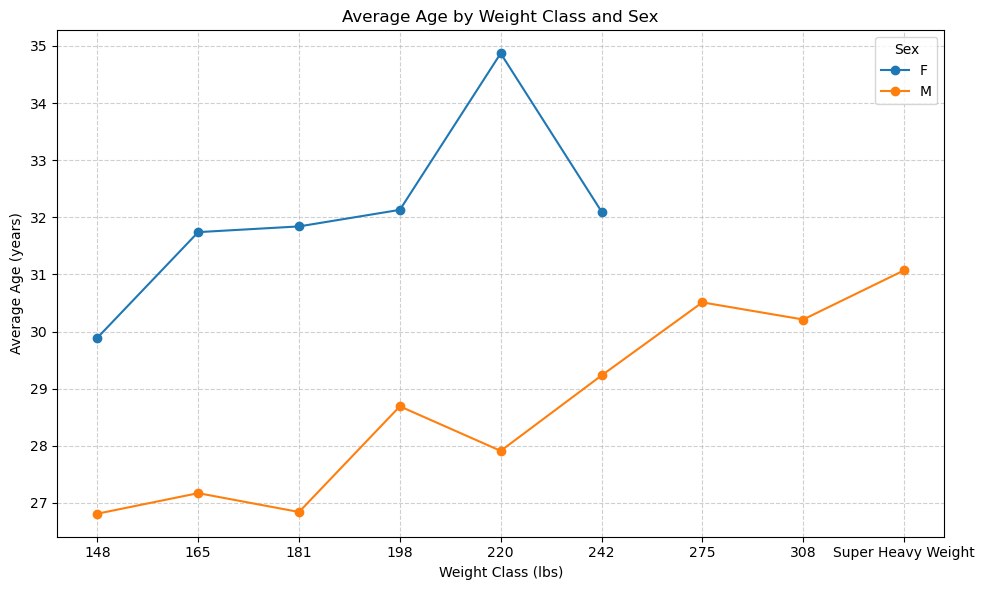

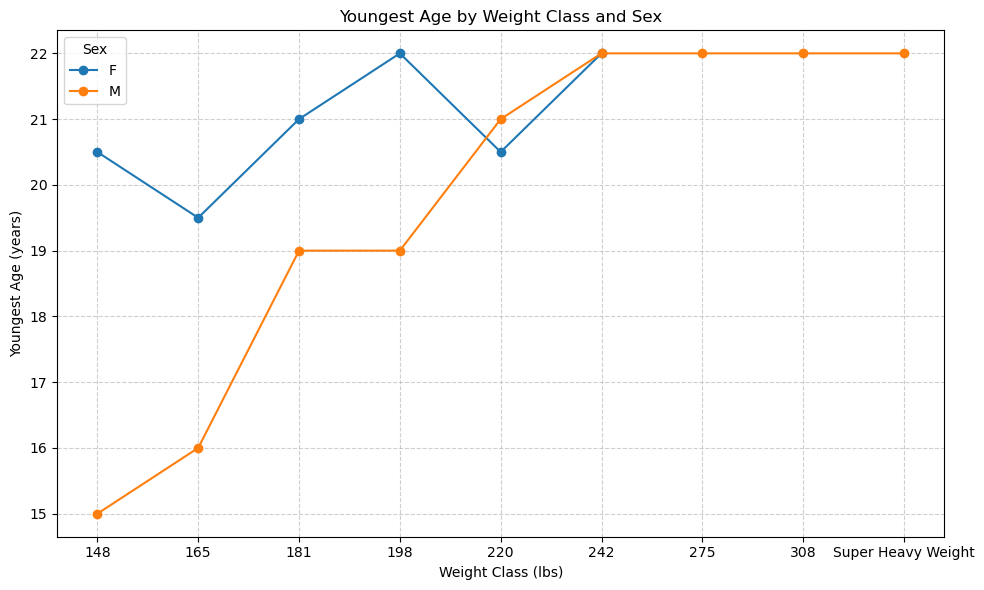

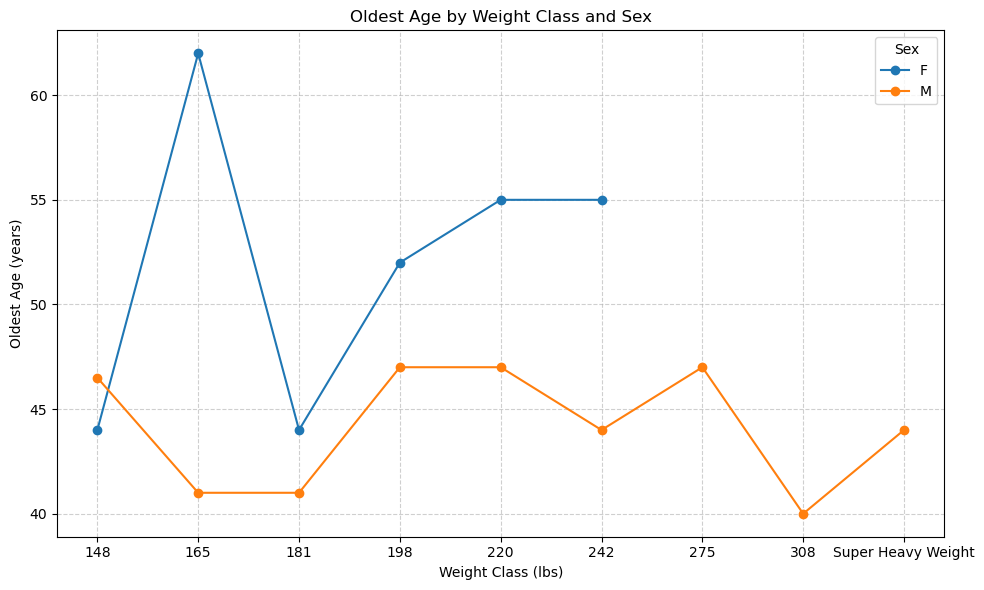

In [2]:
import matplotlib.pyplot as plt

# Reset index for plotting
plot_df = sex_age_comparisons.reset_index()

# Helper: sort weight classes numerically with "Super Heavy Weight" last 
def weightclass_sort_key(wc: str):
    wc = str(wc).strip()
    if wc.lower().startswith("super"):
        return 9999
    try:
        return float(wc.replace("+", "").split()[0])
    except ValueError:
        return 9999

# Sort dataframe by weight class numeric order
plot_df = plot_df.sort_values("weightclass_lbs", key=lambda x: x.map(weightclass_sort_key))

# Build ordered x-axis labels
ordered_labels = sorted(plot_df["weightclass_lbs"].unique(), key=weightclass_sort_key)

# Common plotting style
def plot_age_metric(y_col, title, ylabel):
    plt.figure(figsize=(10,6))
    for sex, data in plot_df.groupby("sex"):
        plt.plot(range(len(data)), data[y_col], marker='o', label=sex)
    plt.xticks(ticks=range(len(ordered_labels)), labels=ordered_labels)
    plt.title(title)
    plt.xlabel("Weight Class (lbs)")
    plt.ylabel(ylabel)
    plt.legend(title="Sex")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Average Age
plot_age_metric(
    y_col="average_age",
    title="Average Age by Weight Class and Sex",
    ylabel="Average Age (years)"
)

# Youngest Age
plot_age_metric(
    y_col="youngest",
    title="Youngest Age by Weight Class and Sex",
    ylabel="Youngest Age (years)"
)

# Oldest Age
plot_age_metric(
    y_col="oldest",
    title="Oldest Age by Weight Class and Sex",
    ylabel="Oldest Age (years)"
)
